In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(60000, 28, 28)
(60000, 784)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'auto_encoder_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch: 0001 cost= 0.064631045
Epoch: 0002 cost= 0.064629450
Epoch: 0003 cost= 0.064627156
Epoch: 0004 cost= 0.064622626
Epoch: 0005 cost= 0.064609885
Epoch: 0006 cost= 0.064535476
Epoch: 0007 cost= 0.059741087
Epoch: 0008 cost= 0.057599723
Epoch: 0009 cost= 0.055847727
Epoch: 0010 cost= 0.053353623
Epoch: 0011 cost= 0.048877746
Epoch: 0012 cost= 0.047285087
Epoch: 0013 cost= 0.043712027
Epoch: 0014 cost= 0.039889529
Epoch: 0015 cost= 0.037838761
Epoch: 0016 cost= 0.035315879
Epoch: 0017 cost= 0.034716118
Epoch: 0018 cost= 0.032379832
Epoch: 0019 cost= 0.030828482
Epoch: 0020 cost= 0.029768221
Optimization Finished!


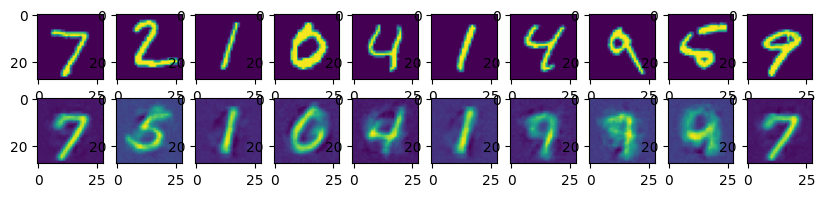

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = y_train.astype('float32') / 255.0
y_test = y_test.astype('float32') / 255.0
x_image_train = tf.reshape(x_train, [-1,28,28,1])
x_image_train = tf.cast(x_image_train, 'float32')
x_image_test = tf.reshape(x_test, [-1,28,28,1])
x_image_test = tf.cast(x_image_test, 'float32')
print(x_train.shape)
flatten_layer = tf.keras.layers.Flatten()
x_train = flatten_layer(x_train)
print(x_train.shape)
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10
global_step = tf.Variable(0)
total_batch = int(len(x_train) / batch_size)
n_hidden_1 = 256
n_hidden_2 = 128
encoding_layer = 32
n_input = 784
encoding_1 = tf.keras.layers.Dense(n_hidden_1, activation=tf.nn.sigmoid)
encoding_2 = tf.keras.layers.Dense(n_hidden_2, activation=tf.nn.sigmoid)
encoding_final = tf.keras.layers.Dense(encoding_layer, activation=tf.nn.relu)
def encoder(x):
    x_reshaped = flatten_layer(x)
    layer_1 = encoding_1(x_reshaped)
    layer_2 = encoding_2(layer_1)
    code = encoding_final(layer_2)
    return code
decoding_1 = tf.keras.layers.Dense(n_hidden_2, activation=tf.nn.sigmoid)
decoding_2 = tf.keras.layers.Dense(n_hidden_1, activation=tf.nn.sigmoid)
decoding_final = tf.keras.layers.Dense(n_input)
def decoder(x):
    layer_1 = decoding_1(x)
    layer_2 = decoding_2(layer_1)
    decode = decoding_final(layer_2)
    return decode
class AutoEncoder(tf.keras.Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.n_hidden_1 = n_hidden_1
        self.n_hidden_2 = n_hidden_2
        self.encoding_layer = encoding_layer
        self.n_input = n_input
        self.flatten_layer = tf.keras.layers.Flatten()
        self.encoding_1 = tf.keras.layers.Dense(self.n_hidden_1, activation=tf.nn.sigmoid)
        self.encoding_2 = tf.keras.layers.Dense(self.n_hidden_2, activation=tf.nn.sigmoid)
        self.encoding_final = tf.keras.layers.Dense(self.encoding_layer, activation=tf.nn.relu)
        self.decoding_1 = tf.keras.layers.Dense(self.n_hidden_2, activation=tf.nn.sigmoid)
        self.decoding_2 = tf.keras.layers.Dense(self.n_hidden_1, activation=tf.nn.sigmoid)
        self.decoding_final = tf.keras.layers.Dense(self.n_input)
    def encoder(self,x):
        layer_1 = self.encoding_1(x)
        layer_2 = self.encoding_2(layer_1)
        code = self.encoding_final(layer_2)
        return code
    def decoder(self, x):
        layer_1 = self.decoding_1(x)
        layer_2 = self.decoding_2(layer_1)
        decode = self.decoding_final(layer_2)
        return decode
    def call(self, x):
        encoder_op  = self.encoder(x)
        y_pred = self.decoder(encoder_op)
        return y_pred
def cost(y_true, y_pred):
    mse = tf.keras.losses.MeanSquaredError()
    loss = mse(y_true, y_pred)
    cost = tf.reduce_mean(loss)
    return cost
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        reconstruction = model(inputs)
        loss_value = cost(targets, reconstruction)
    return loss_value, tape.gradient(loss_value, model.trainable_variables),reconstruction
model = AutoEncoder()
optimizer = tf.keras.optimizers.RMSprop(learning_rate)
for epoch in range(training_epochs):
    for i in range(total_batch):
        x_inp = x_train[i : i + batch_size]
        loss_value, grads, reconstruction = grad(model, x_inp, x_inp)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1),
              "cost=", "{:.9f}".format(loss_value))
print("Optimization Finished!")
encode_decode = model(flatten_layer(x_image_test[:examples_to_show]))
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(x_image_test[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))